In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import mglearn
from sklearn.neighbors import KNeighborsClassifier

In [2]:
A = pd.DataFrame({"feature1": np.random.normal(100, 10, 100), "feature2":np.random.normal(5, 1, 100)})
A.head(2)

,feature1,feature2
0,91.879975,5.302004
1,96.850557,4.494359


In [3]:
B = pd.DataFrame({"feature1": np.random.normal(80, 20, 100), "feature2":np.random.normal(8, 2, 100)})
B.head(2)

,feature1,feature2
0,111.527874,7.498104
1,117.264573,6.522150


In [4]:
ax = (A.sample(n=30))
bx = (B.sample(n=20))
X = np.concatenate((ax, bx))
np.shape(X)

(50, 2)

In [5]:
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

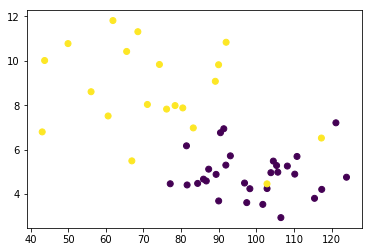

In [6]:
plt.scatter(x=X[:,0], y=X[:,1], c=Y)
plt.show()

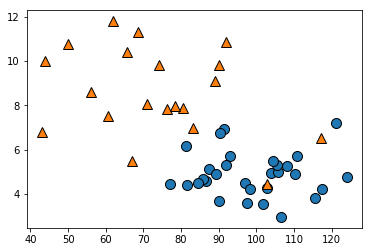

In [7]:
mglearn.discrete_scatter(x1=X[:,0], x2=X[:,1], y=Y)

In [8]:
knn = KNeighborsClassifier(2)
knn.fit(X, Y)
x_new = np.array([[90, 7]])
result = knn.predict(x_new)
print(result[0])

0


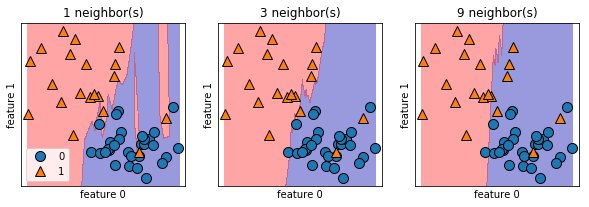

In [9]:
fig, axes = plt.subplots(1,  3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, Y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], Y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
scaler = StandardScaler()

In [12]:
X_train, X_test = train_test_split(X)
X_scaled = scaler.fit(X_train).transform(X)
X_test = scaler.transform(X)

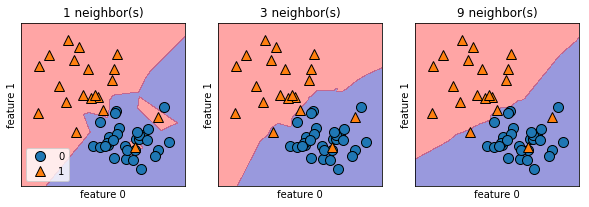

In [13]:
fig, axes = plt.subplots(1,  3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_scaled, Y)
    mglearn.plots.plot_2d_separator(clf, X_scaled, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_scaled[:,0], X_scaled[:,1], Y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [17]:
golf_sim_train = pd.read_table('golf_sim_launch.txt', sep="\s+")
golf_sim_train.head()

,swing_speeds,launch_angle,spin_rate,distance
0,110.197622,10.849306,2370.410608,298.648689
1,111.849113,13.215929,2847.194327,285.901936
2,120.793542,8.764235,3043.939256,299.563910
3,113.352542,11.888876,2883.035342,313.101072
4,113.646439,13.038814,2454.537081,305.089199


In [18]:
golf_sim_test = pd.read_table('golf_sim_launch_test.txt', sep="\s+")
golf_sim_test.head()

,swing_speeds,launch_angle,spin_rate
0,109.447967,12.238490,2694.972109
1,114.284419,12.487375,3087.243444
2,111.766541,14.464952,2064.490285
3,111.262287,10.967872,2864.328119
4,108.241907,10.014986,2390.835049


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
y = golf_sim_train["distance"]
x = golf_sim_train.drop(columns=["distance"])
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [21]:
lr = LinearRegression().fit(x_train, y_train)

In [22]:
lr.score(x_train, y_train)

0.477413847791346

In [23]:
lr.score(x_test, y_test)

0.5822741605591875

In [24]:
lr.coef_

array([2.23683310e+00, 1.46631980e+00, 1.54538878e-03])

In [25]:
problem2_predictions = lr.predict(golf_sim_test)

In [26]:
type(problem2_predictions)

numpy.ndarray

In [27]:
problem2_predictions

array([289.98380944, 301.77329978, 297.46043595, 292.44072843,
       283.5556754 , 302.2659206 , 287.32277025, 277.04887947,
       290.38013964, 303.94775031])